<a href="https://colab.research.google.com/github/Rishabh1928/Company_Classification_Clustering/blob/main/Rishabh_Kesarwani_Company_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement :**

Classify businesses and companies across a standard taxonomy.

This dataset comes with pre-classified companies along with data from the website.

The main objective is to cluster companies based on their description on the website.

###**Overview of columns in the dataset :**

1. website: The website of the company/business
2. company_name: The company/business name
3. homepage_text : Visible homepage text
4. h1: The heading 1 tags from the html of the home page
5. h2: The heading 2 tags from the html of the home page
6. h3: The heading 3 tags from the html of the home page
7. navlinktext: The visible titles of navigation links on the homepage (Ex: Home, Services,
Product, About Us, Contact Us)
8. metakeywords: The meta keywords in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)
9. metadescription: The meta description in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)

In [1]:
# Loading the basic dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data

file_path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/data_company_classification.csv"
df = pd.read_csv(file_path)

**Basic Inspection**

In [3]:
# Checking head of df

df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [5]:
df.shape

(73974, 9)

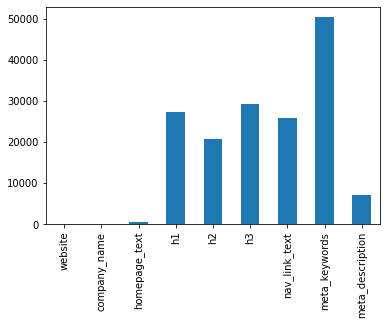

In [6]:
# Null values in dataset

df.isnull().sum().plot.bar()

`I need to takecare for headers, so I will be doing most of the things on h1 , h2 & h3`

In [7]:
df.h1.describe()

count     46653
unique    44133
top        Home
freq        630
Name: h1, dtype: object

In [8]:
df.h2.describe()

count                                                 53212
unique                                                50732
top       Follow Us:and share our news...#sep#UK.COM Awa...
freq                                                    107
Name: h2, dtype: object

In [9]:
df.h3.describe()

count                                                 44659
unique                                                42130
top       Safe Payments By Adyen#sep#Fast Domain Transfe...
freq                                                    117
Name: h3, dtype: object

In [10]:
# Constructing a df that will have headers only! (Will take company name as well for any reference)

df_headers = df[["company_name" , "h1" , "h2" , "h3"]]

In [11]:
df_headers.head()

,company_name,h1,h2,h3
0,bip dipietro electric inc,NaN,NaN,NaN
1,elias medical,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...
2,koops overhead doors,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN
3,midtown eyecare,NaN,Welcome to our practice!,NaN
4,repro security ltd,NaN,Welcome to REPRO SECURITY Ltd,NaN


In [12]:
df_headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  73974 non-null  object
 1   h1            46653 non-null  object
 2   h2            53212 non-null  object
 3   h3            44659 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [13]:
df_headers.shape

(73974, 4)

In [14]:
# Null values in header h1

print("Count of null values in h1:" , df_headers["h1"].isnull().sum())

# Percentage of null values for h1

print("Percentage of null values in h1: " , round(df_headers["h1"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h1: 27321
Percentage of null values in h1:  36.93


In [15]:
# Null values in header h2

print("Count of null values in h2:" , df_headers["h2"].isnull().sum())

# Percentage of null values for h2

print("Percentage of null values in h2: " , round(df_headers["h2"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h2: 20762
Percentage of null values in h2:  28.07


In [16]:
# Null values in header h3

print("Count of null values in h3:" , df_headers["h3"].isnull().sum())

# Percentage of null values for h3

print("Percentage of null values in h3: " , round(df_headers["h3"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h3: 29315
Percentage of null values in h3:  39.63


*It's like loosing too much information if we opt for dropping null values!!*

**Let's combine h1 , h2 & h3 and then check for null..**

In [17]:
# Replacing null values with empty string (so that when we combine header, it won't screw up because of NaN)

df_headers = df_headers.fillna(" ")

In [18]:
df_headers.head()

,company_name,h1,h2,h3
0,bip dipietro electric inc,,,
1,elias medical,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...
2,koops overhead doors,,Customer Reviews#sep#Welcome to Koops Overhead...,
3,midtown eyecare,,Welcome to our practice!,
4,repro security ltd,,Welcome to REPRO SECURITY Ltd,


In [19]:
# Merging h1 , h2 & h3

df_headers["headers"] = df_headers["h1"] + " " + df_headers["h2"] + " " + df_headers["h3"]

In [20]:
pd.set_option("display.max_colwidth" , -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [21]:
df_headers.head()

,company_name,h1,h2,h3,headers
0,bip dipietro electric inc,,,,
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical",Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300,Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,,Customer Reviews#sep#Welcome to Koops Overhead Doors!,,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,,Welcome to our practice!,,Welcome to our practice!
4,repro security ltd,,Welcome to REPRO SECURITY Ltd,,Welcome to REPRO SECURITY Ltd


In [22]:
# Now, dropping h1 , h2 & h3

df_headers.drop(["h1" , "h2" , "h3"] , axis = 1 , inplace=True)

In [23]:
df_headers.head()

,company_name,headers
0,bip dipietro electric inc,
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,Welcome to our practice!
4,repro security ltd,Welcome to REPRO SECURITY Ltd


In [24]:
df_headers["headers"][0]

'     '

In [25]:
# Total number of empty headers even after merging (it's 5 white spaces as we have added extra spaces in between to separate text while merging cols)

emp_val = sum(df_headers["headers"] == '     ')
emp_val

7461

In [26]:
# Percentage of empty values after merging

print("Percentage of empty values of header after merging all headers: " , round(emp_val/df_headers.shape[0] * 100 , 2))

Percentage of empty values of header after merging all headers:  10.09


*It's 10% and now we can drop these!*

In [27]:
# Dropping empty values in headers

df_headers.drop(df_headers[df_headers['headers'] == '     '].index , inplace=True)

In [28]:
df_headers.head()

,company_name,headers
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,Welcome to our practice!
4,repro security ltd,Welcome to REPRO SECURITY Ltd
5,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green#sep#Opening Hours#sep#Location | Potter Bar"


In [29]:
df_headers.shape

(66513, 2)

In [30]:
# Resetting index

df_headers.reset_index(inplace=True)

In [31]:
df_headers.columns

Index(['index', 'company_name', 'headers'], dtype='object')

In [32]:
# Dropping index

df_headers.drop("index" , axis = 1 , inplace = True)

In [33]:
df_headers.tail()

,company_name,headers
66508,patagonia foods,Retail#sep#Quality & food safety#sep#Who We Serve#sep#Beverages#sep#Products we offer#sep#Ingredients#sep#Manufacturing#sep#Food Service Frozen Fresh Daily#sep#Keep Healthy Clean#sep#Simple & Sweet#sep#Fruit for All#sep#Activate your Health#sep#Nature’s Frost#sep#Farm to Frozen#sep#Vegetarian-Approved#sep#Fuel your Nutrition#sep#Plant Power#sep#Nothing less than 100% Satisfaction
66509,claddagh coffee,​
66510,beautyologist,Beautyologist Beauty Salon Welcome to Beautyologist#sep#Sia's Spotlight Specialist in skin & body beauty#sep#Lymphatic Drainage Facial Massage#sep#Fear of Missing Out?
66511,beauty call,Mobile Hair & Makeup Artists across the UK Why use us?#sep#253 artists available to your location#sep#Our background#sep#Here's how we can help you#sep#Hair & Makeup Artists all over the UK#sep#Key members of our team#sep#Here's what some of our clients say... Fran#sep#Special Occasions#sep#Lessons#sep#Head Office#sep#Popular Services#sep#Chloe-P#sep#Connect with us:#sep#Alison#sep#Request a call back#sep#Hen Parties#sep#Beauty Call#sep#Beauty Call Head Office#sep#Ella#sep#Grace-R#sep#Contact via email:#sep#Becky-S#sep#Samantha-B#sep#Corporate Events#sep#General enquiries:#sep#Marie-K#sep#Haleema#sep#Carol#sep#Popular Locations#sep#Weddings#sep#Proms#sep#Booking form:#sep#Have questions?
66512,little lady foods,"Discover, Innovate, Execute, Enjoy! Pizza is our passion, and we want to share it with you#sep#We want to bring your ideas to life#sep#We are your full-service pizza partner#sep#We know pizza Branded#sep#Contact Us#sep#Crusts from classic to artisan#sep#Grocery-aisle ready packaging#sep#Food Service#sep#Execute on a major scale#sep#Private Label#sep#We are creators, innovators and experts#sep#No limit on flavor#sep#Innovation is our recipe for success"


In [34]:
df_headers[1677:1678]["headers"]

1677      CCTV#sep#CCTV on your Mobile#sep#Home Alarm Systems#sep#Access Control#sep#Commercial Alarms#sep#Domestic Alarms an included 12 month warranty#sep#The Latest wireless technologies with#sep#Simply download the app#sep#SERVICES#sep#against burglary#sep#to view your CCTV anywhere!#sep#Protect your property from unwanted visitors#sep#Protect your business#sep#with our advanced access systems.
Name: headers, dtype: object

**Text Preprocessing..**

In [35]:
# function for replacing # with whitespaces (if we deal it with punctuation removal then the words just before and after hashtag will be joined together, which won't make any sense)

def hashtag(text):

  text = text.replace("#" , " ")

  return text

In [36]:
df_headers["headers"] = df_headers["headers"].apply(hashtag)

In [37]:
df_headers.head()

,company_name,headers
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care"
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!
2,midtown eyecare,Welcome to our practice!
3,repro security ltd,Welcome to REPRO SECURITY Ltd
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar"


In [38]:
# Function to get the count of word in string

def get_len(text):

  '''function to get the count of words in string'''
  
  import re

  # using regex (findall())
  # to count words in string

  res = len(re.findall(r'\w+', text))

  return res

In [39]:
# Count of words in each of the header

df_headers["len"] = df_headers["headers"].apply(get_len)

In [40]:
df_headers.head()

,company_name,headers,len
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care",55
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!,8
2,midtown eyecare,Welcome to our practice!,4
3,repro security ltd,Welcome to REPRO SECURITY Ltd,5
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar",94


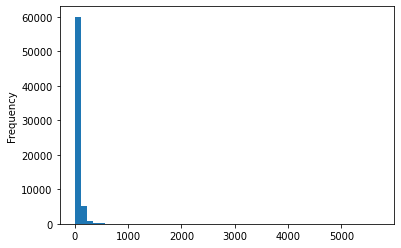

In [41]:
# Distribution of words

df_headers["len"].plot(bins = 50 , kind = "hist")

In [42]:
df_headers.len.describe()

count    66513.000000
mean     54.440666   
std      84.444495   
min      0.000000    
25%      17.000000   
50%      36.000000   
75%      68.000000   
max      5708.000000 
Name: len, dtype: float64

In [43]:
df_headers[df_headers["len"] == 0] # as there are only special characters

,company_name,headers,len
4236,newportcare medical group,©,0
7276,question de finance inc.,... &,0
9178,cedar street asset management llc,​,0
9807,kushal chemicals,﻿,0
13528,"sentynl therapeutics, inc.",.,0
16045,scrap metal merchants,​,0
20228,"go architects, inc.",​,0
27586,morado energy minerals,.,0
32737,smv recruiting,​,0
38906,"brittany janae public relations, inc.",-,0


In [44]:
# Dropping these as they are not adding any value

df_headers.drop(df_headers[df_headers['len'] == 0].index , inplace=True)

In [45]:
df_headers[df_headers["len"] < 3]

,company_name,headers,len
74,secured financial solutions,- Quick Contact,2
84,gallery office solutions limited,Home,1
155,lendings biz,​​Lending.biz,2
263,ranford medical centre,LATEST NEWS,2
274,cavendish asset research ltd,Important Information,2
...,...,...,...
66166,food technology consulting,Contact,1
66172,mckeown fine foods limited,Contact Details:,2
66282,mid-state wine & liquor,Newsletter!,1
66315,juice works,Home Home,2


In [46]:
# Dropping rows having less than 3 words as they are not adding value!

df_headers.drop(df_headers[df_headers["len"] < 3].index , inplace=True)

In [47]:
df_headers.shape

(65017, 3)

**Checking for special characters**

In [49]:
s = 'abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ'
specials = set()

In [51]:
for text in df_headers['headers']:
    for c in text:
        if c not in s:
            specials.add(c)

In [53]:
for special in specials:
    print(special[:2000])

🏳
👏
册

{
벤
⛔
癖
ジ
조
̦
脏
冲
买
管
 
產
Â
古
.
†
⁠

玉
改
ไ
≫
纪
贤
報
世
童
ü
荐
主
ỗ
ó
ध
🏔
妖
困
必
须
れ
õ
题
¦
脉
纯
継
ε
几
科
动
ద
प
献
単
载
粪
기
ハ
肯
😋
強
🏼
控
緯
ब
们
❤
很
遇
循
合
架
培
脸
响
Ř
普
家
ỉ

希
て
慕
战
逼
论
暮
,
ภ
ト
済
鄂
逆
ỷ
🎉
使
甘
颈
胖
王
精
μ
💡
中
ú
终
挑
種
徐
ઇ
反
』
道
ي
平
抢
移
問
塞
微
ీ
丸
○
眼
з
げ
低
携

ľ
モ
用
★
致
愿
📸

ц
あ

岁
🎦
线
λ
ﬂ
✔
ئ
周
ヒ
運
短
ų
読
„
斩
ๆ
冠
т
➸
Ω
|
片
辣
🍀

节
解
의
则
ು
่
春
}
品
ร
二
ค
时
ढ
兹
東
ŋ
基
顶
ペ
🚨
负
足
伤
ご
✨
➜
坚
ل
厂
结
绝
雅
先
ム
ऐ
Ț
升
)
ズ
順
死
料
锐
大
心
崩
ﺳ
➤
έ
速
房
國
妹
月
久
监
台
住
法
応
肉
析
樂
ﬃ
ณ
‪
😘
к
🍻
共
δ
筛
烂
黛
翻
棚
×
毅
↡
援

ω
ಂ
🛒
Í
ದ
就
危
実
関
σ
谢
ờ
尖

药
å
环
🍒
ﬀ
奸
審
如
↦
租
ﯽ
于
ề
ड
阴
と
概
到

➕
拍
蔓
Ш
医
す
వ
址
炉
ధ
？
簡
密
肤
勧
键

ヘ
妻


υ
ป
可
量
ọ
现
—
整
ニ
저
居
刚
代
获
禁
🥄
数
了
走
书
<
罩
🧡
🍎
ベ
阿
🇩
套
出
际
卫
γ
崖
ూ
ن
お
›
明
教
の
丽
目
ת
𝗨
止
ư
ẫ
ย
有
ế
ె

ර
િ
ạ
富
ื
彭
院
\
ك
ч
復

胜
享
撞
证
Г
考
้
森
欢
需
籍
;
广
看
उ
後
十
恢
ė
▪
卷
额
👇
做
远
逾
Π
·
👢
ก
ಿ
Ｅ
赤
独
⦁
業
ד
前
¢
Н
ृ
具
ש
察
调
六
插
吃
𝗗
输
奖
渐
轰
🏻
右
✩
够
蜡
象
乐
嘉
ฟ
疫
谱
穴
扎
观
➢

彩
ž
着
你
サ
🏒
萄
昂
β
灾
划
施
状
外
寿
聚
导
野
娥
农
傾
冷
Ą
俄
恩
士
Ñ
韓
ẽ
真
学
人
∙
例
ポ
州
光
判
舟
☰
拉
晚
ಇ
甜
京
ओ
™
电
み
算
調
果
श
红
😁
探
驴
各
ə
娱
访
妇
马

In [54]:
import string
import unicodedata as ud

In [56]:
# this function removes emojis and also converts visually similar characters to normat Lating characters

def to_unicode(text):
    return ud.normalize('NFD', text).encode('ascii','ignore').decode('utf-8')

In [58]:
to_unicode('Data濯🏠𝙖 Science 💕')

'Data Science '

**Function to remove punctuation**

In [59]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

**Function to remove stop words**

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
stopwords.words("english")[:10] # first 10 stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [62]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words("english")]
    # joining the list of words with space separator
    return " ".join(text)

**Function to remove digits from text**

In [63]:
def remove_digits(text):
  '''function for removing digits from text'''

  text = "".join([i for i in text if not i.isdigit()])

  return text

**Function for Stemming**

In [54]:
# from nltk.stem.snowball import SnowballStemmer

In [55]:
# stemmer = SnowballStemmer("english")

# def stemming(text):
#   '''a function which stems each word in the given text'''

#   l = [stemmer.stem(word) for word in text.split()]
  
#   return " ".join(l)

**Funtion for Lemmatization**

In [64]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [65]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [66]:
tag_map

defaultdict(<function __main__.<lambda>>, {'J': 'a', 'R': 'r', 'V': 'v'})

In [67]:
def lemmatize_text(text):
  
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  l = []
  for token, tag in pos_tag(tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    l.append(lemma)
    
  return " ".join(l)

In [68]:
a = "Data Science is a totally newest kinds of learning experiencing."

In [69]:
lemmatize_text(a)

'Data Science be a totally new kind of learn experience .'

In [70]:
b = "offering bakersfield family medical care pediatrics geriatrics also offering skin care including botox laser skin treatment sep elia medical welcome elia medical sep family medical practice sep skin care sep schedule consultation get know elia medical sep family medical practice sep consultation sep skin care"

In [71]:
lemmatize_text(b)

'offer bakersfield family medical care pediatrics geriatrics also offer skin care include botox laser skin treatment sep elia medical welcome elia medical sep family medical practice sep skin care sep schedule consultation get know elia medical sep family medical practice sep consultation sep skin care'

**Function to call each of the above functions**

In [72]:
def text_cleaning(text):
  text = to_unicode(text)
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = remove_digits(text)
  text = lemmatize_text(text)

  return text

In [73]:
# Checking how our df looks before applying text prepocessing functions

df_headers.head()

,company_name,headers,len
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care",55
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!,8
2,midtown eyecare,Welcome to our practice!,4
3,repro security ltd,Welcome to REPRO SECURITY Ltd,5
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar",94


In [74]:
# Applying it to the headers

df_headers["headers"] = df_headers["headers"].apply(text_cleaning)

In [75]:
# Checking data after applying text preprocessing steps defined above &
# updating count of words in each header

df_headers["len"] = df_headers["headers"].apply(get_len)

In [76]:
df_headers.head()

,company_name,headers,len
0,elias medical,offer bakersfield family medical care pediatrics geriatrics also offer skin care include botox laser skin treatment sep elias medical welcome elias medical sep family medical practice sep skin care sep schedule consultation get know elias medical sep family medical practice sep consultation sep skin care,45
1,koops overhead doors,customer review sep welcome koops overhead door,7
2,midtown eyecare,welcome practice,2
3,repro security ltd,welcome repro security ltd,4
4,wood green timber company limited,wood green timber co ltd london potter bar hertfordshire yard stock comprehensive selection timber suitable wide variety use floor joist decorative moulding stock ready take away delivery prefer aim maintain high stock level order satisfy building requirement immediately however equally happy source specialist requirement delivery collection later date location wood green sep opening hour sep location potter bar,58


In [77]:
# Further cleaning

import re

def text_cleaner(text):
  rules = [
        {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
        {r'\s+': u' '},  # replace consecutive spaces
        {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
        {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
        {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
        {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
        {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
        {r'^\s+': u''}  # remove spaces at the beginning
    ]
  for rule in rules:
      for (k, v) in rule.items():
        regex = re.compile(k)
        text = regex.sub(v, text)
  text = text.rstrip()
  return text.lower()

In [78]:
df_headers["headers"] = df_headers["headers"].apply(text_cleaner)

**Function to remove words having 3 or less than 3 characters**

In [79]:
# Function to remove words smaller than 3 letters

def remove_shortword(text):
  return ' '.join(word for word in text.split() if len(word)>3)

In [80]:
# Applying remove_shortword

df_headers["headers"] = df_headers["headers"].apply(remove_shortword)

**Function to remove non-english words**

In [81]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [82]:
words = set(nltk.corpus.words.words())

def remove_nonenglish(text):

  return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

In [83]:
# Checking the remove non-english words

remove_nonenglish("Io andiamo ldfirfur rf wejdn to  be  see the beach with my amico")

'Io to be see the beach with my'

In [84]:
# Applying the above funtion in our df

df_headers["headers"] = df_headers["headers"].apply(remove_nonenglish)

In [85]:
# Updating count of words in headers

df_headers["len"] = df_headers["headers"].apply(get_len)

In [86]:
df_headers.head()

,company_name,headers,len
0,elias medical,offer family medical care pediatrics geriatrics also offer skin care include laser skin treatment medical welcome medical family medical practice skin care schedule consultation know medical family medical practice consultation skin care,32
1,koops overhead doors,customer review welcome overhead door,5
2,midtown eyecare,welcome practice,2
3,repro security ltd,welcome security,2
4,wood green timber company limited,wood green timber potter yard stock comprehensive selection timber suitable wide variety floor joist decorative stock ready take away delivery prefer maintain high stock level order satisfy building requirement immediately however equally happy source specialist requirement delivery collection later date location wood green opening hour location potter,47


In [87]:
df_headers[df_headers["len"] < 5] # doesn't make anysense

,company_name,headers,len
2,midtown eyecare,welcome practice,2
3,repro security ltd,welcome security,2
33,ocean cleaning london ltd,company check service client,4
41,go security systems ltd.,control security specialist,3
50,sovereign environmental group,environmental group sovereign,3
...,...,...,...
66463,general beverage sales company,general beverage,2
66471,vancouver international coffee and tea awards festival,festival pacific festival festival,4
66498,"owl's nest bakery, llc",affordable host solution,3
66502,alvarium beer company,,0


In [88]:
# Dropping those having count of words less than 3 (this is after text preprocessing steps)

df_headers.drop(df_headers[df_headers["len"] < 5 ].index , inplace=True)

In [89]:
df_headers.shape

(57367, 3)

In [90]:
# Saving this text preprocessed data as a separate file to avoid repeating the same steps again in future

dir = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/preprocessed.csv"

df_headers.to_csv(dir , index=False)

**Vectorization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data

path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/preprocessed.csv"

dfh = pd.read_csv(path)

In [3]:
dfh["headers"].values

array(['offer family medical care pediatrics geriatrics also offer skin care include laser skin treatment medical welcome medical family medical practice skin care schedule consultation know medical family medical practice consultation skin care',
       'customer review welcome overhead door',
       'wood green timber potter yard stock comprehensive selection timber suitable wide variety floor joist decorative stock ready take away delivery prefer maintain high stock level order satisfy building requirement immediately however equally happy source specialist requirement delivery collection later date location wood green opening hour location potter',
       ...,
       'beauty salon welcome spotlight specialist skin body beauty lymphatic drainage facial massage fear miss',
       'mobile hair artist across artist available location background help hair artist member team here client special occasion lesson head office popular service connect alison request call back party beauty call

In [4]:
dfh.shape

(57367, 3)

In [5]:
dfh.len.describe()

count    57367.000000
mean        27.659281
std         33.518728
min          5.000000
25%         11.000000
50%         19.000000
75%         34.000000
max       1872.000000
Name: len, dtype: float64

**TF-IDF**

In [6]:
# Importing tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Instantiating object of tfidf

vectorizer = TfidfVectorizer(max_df = 0.8 , min_df = 0.01 , use_idf=True)

In [8]:
# Fitting & transforming

X = vectorizer.fit_transform(dfh["headers"])

In [9]:
X.shape

(57367, 462)

In [10]:
X # sparse matrix

<57367x462 sparse matrix of type '<class 'numpy.float64'>'
	with 713909 stored elements in Compressed Sparse Row format>

In [11]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X = X.toarray() # this matrix will be our input to model

In [13]:
X.shape

(57367, 462)

**TSNE**

In [14]:
# from sklearn.manifold import TSNE

# X2 = TSNE(perplexity=30).fit_transform(X)

##**Clustering**

###**K-Means**

In [15]:
# Importing

from sklearn.cluster import KMeans

In [16]:
# Trying with default num of clusters 8

kmeans = KMeans(init="k-means++", random_state=42)

In [17]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
kmeans.cluster_centers_

array([[ 1.55889315e-03,  2.99518079e-03,  5.47808981e-04, ...,
         1.22960460e-02,  1.60070560e-03,  1.22965327e-02],
       [ 2.29547828e-03,  6.70169892e-03,  9.08593756e-05, ...,
         9.03805301e-03,  9.74178762e-04,  1.21402501e-02],
       [ 2.38222265e-03,  1.83967589e-03, -1.31405303e-16, ...,
         1.19630536e-03,  1.08496359e-03,  1.00020897e-02],
       ...,
       [ 3.29728846e-03,  4.18336751e-03,  2.08418905e-03, ...,
         1.00758267e-02,  1.99079685e-03,  1.25180364e-02],
       [ 3.94056833e-03,  6.39414881e-03,  9.94249302e-03, ...,
         5.23303144e-03,  2.04597404e-03,  1.43723815e-02],
       [ 4.46816712e-03,  6.38232451e-03,  3.43271547e-03, ...,
         9.16074313e-03,  2.94790648e-03,  1.27311928e-02]])

In [19]:
kmeans.labels_[:10] #first 10

array([3, 7, 7, 7, 5, 6, 7, 5, 6, 6], dtype=int32)

In [20]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [21]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 2114, 1: 3504, 2: 1583, 3: 3133, 4: 1535, 5: 5114, 6: 9319, 7: 31065}

In [22]:
kmeans.inertia_

52492.881899990905

**Optimal K**

**1) Elbow Method**

In [26]:
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 500, "random_state": 42}

In [27]:
# A list holds the SSE values for each k

wcss = []
for k in range(2, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

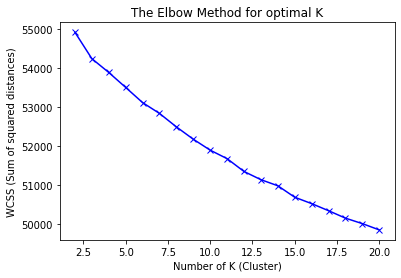

In [28]:
# Plotting

plt.plot(range(2,21),wcss ,'bx-')
plt.title('The Elbow Method for optimal K')
plt.xlabel('Number of K (Cluster)')
plt.ylabel('WCSS (Sum of squared distances)')
plt.show()

##**We are not getting pure elbow curve but if we look closely we can take our optimal K (number of clusters) as "13"..**

**Alternatively**

In [65]:
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

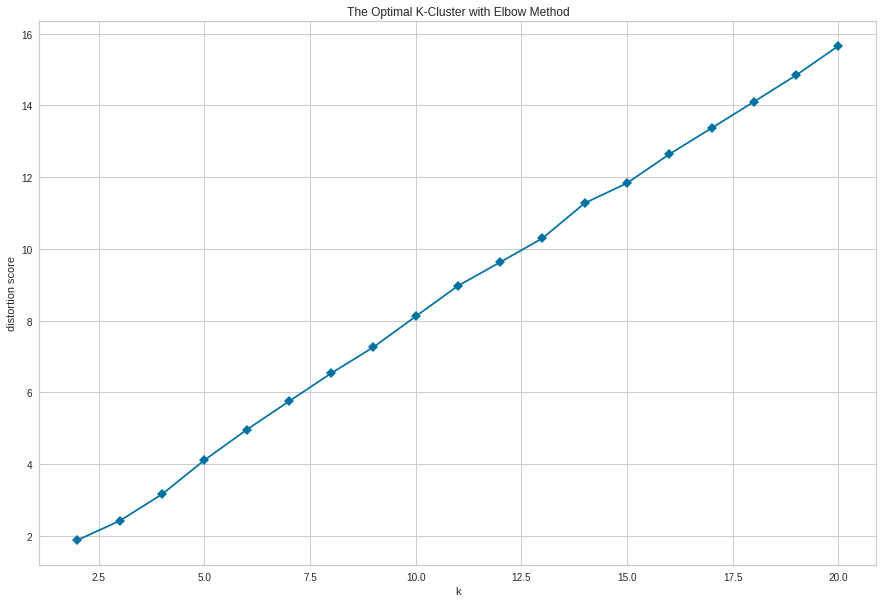

In [66]:
# Plotting Distortion for different K's

kmeans = KMeans(random_state=42)

titleKElbow = "The Optimal K-Cluster with Elbow Method"
visualizer = KElbowVisualizer(kmeans, k=(2,21), metric= 'distortion', title = titleKElbow , timings= False,locate_elbow=True , size=(1080, 720))
visualizer.fit(X)
visualizer.poof()

In [ ]:
# Metric : Calinski Harabaz (Optimal K where Calinski Harabaz score is maximum)

titleKElbow = "The Optimal K-Cluster with Elbow Method"
visualizer = KElbowVisualizer(kmeans, k=(2,15), metric='calinski_harabaz', title = titleKElbow , timings= False,locate_elbow=True , size=(1080, 720))
visualizer.fit(X)
visualizer.poof()

In [67]:
from sklearn.metrics import silhouette_score , silhouette_samples

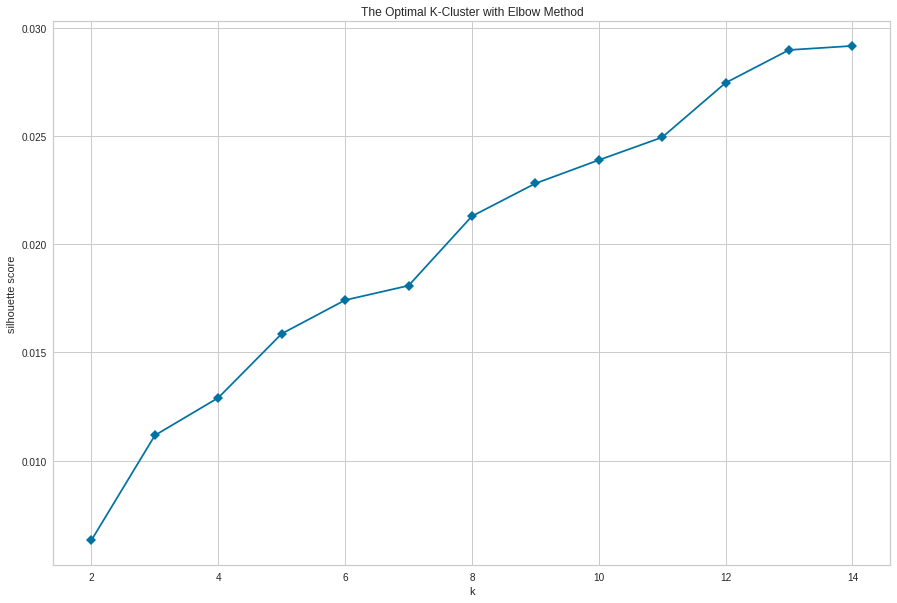

In [68]:
# Metric: Silhoutte Score

titleKElbow = "The Optimal K-Cluster with Elbow Method"
visualizer = KElbowVisualizer(kmeans, k=(2,15), metric='silhouette', title = titleKElbow , timings= False,locate_elbow=True , size=(1080, 720))
visualizer.fit(X)
visualizer.poof()

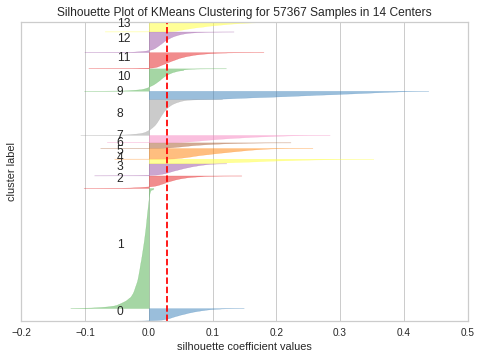

In [70]:
# Alternate for visualizing silhoutte score

from yellowbrick.cluster import SilhouetteVisualizer

sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X)    # Fit the data to the visualizer
sil_visualizer.poof()    # Draw/show/poof the data

##**So, we are heading with 13 number of clusters and will see how our word cloud will look like..**

**Labelling cluster based on true K**

In [30]:
# Labelling clusters

true_k = 13
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_
header_cl = pd.DataFrame(list(zip(dfh["headers"],labels)),columns=['headers','cluster'])

In [33]:
header_cl.head()

,headers,cluster
0,offer family medical care pediatrics geriatric...,9
1,customer review welcome overhead door,7
2,wood green timber potter yard stock comprehens...,10
3,opportunity doesnt knock build door chemical,10
4,twitter lead program news event target neurode...,4


In [37]:
header_cl.cluster.value_counts()

10    25028
5      6994
3      4074
7      3216
11     3133
9      2591
4      2409
2      2056
12     1843
6      1823
1      1566
8      1483
0      1151
Name: cluster, dtype: int64

**Word Cloud for each cluster**

In [47]:
from wordcloud import WordCloud

In [55]:
from PIL import Image
import numpy as np

In [61]:
mask = np.array(Image.open('/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/1_OVqX0ePobZYOwENYtXKuqQ.jpeg'))
font_path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/Vogue.ttf"

In [62]:
text = []

for i in range(13):
    cluster_df = header_cl[header_cl['cluster']==i]
    text.append(' '.join(list(cluster_df['headers'])))

In [63]:
# fucntion to create wordcloud

def word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white" , font_path=font_path , mask=mask , width=mask.shape[1], height=mask.shape[0]).generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word cloud for cluster 0


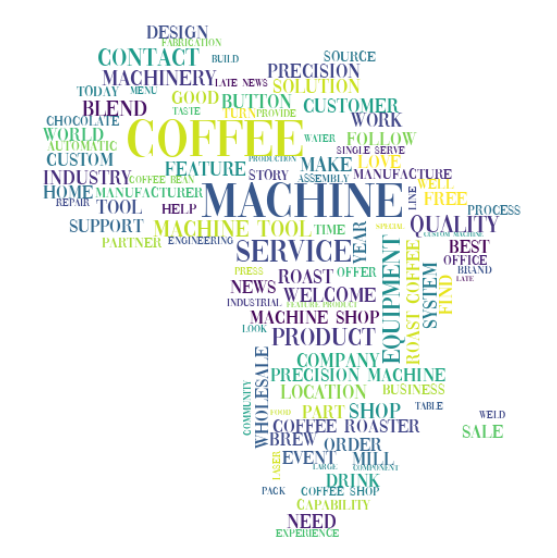

Word cloud for cluster 1


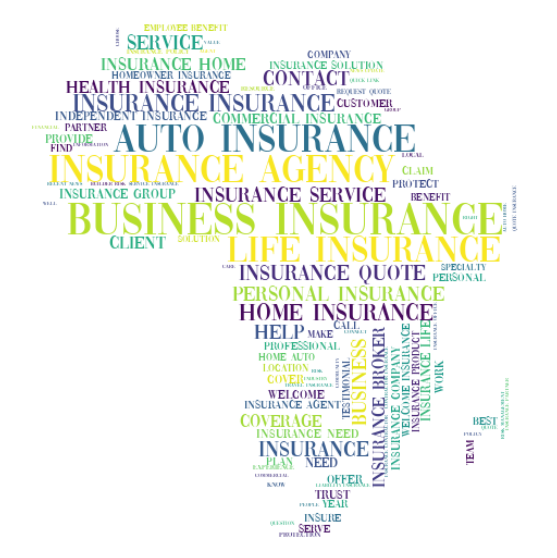

Word cloud for cluster 2


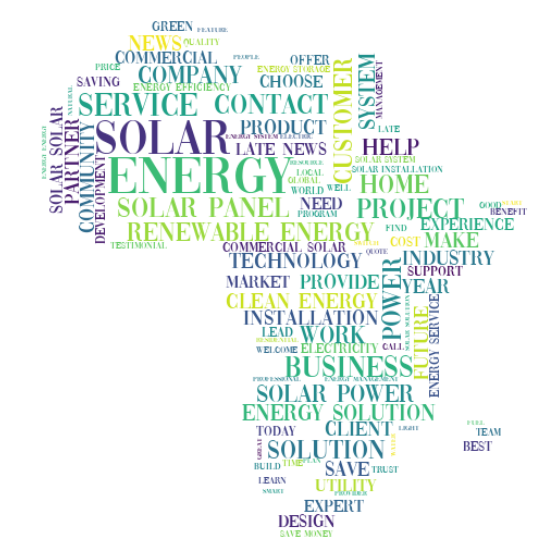

Word cloud for cluster 3


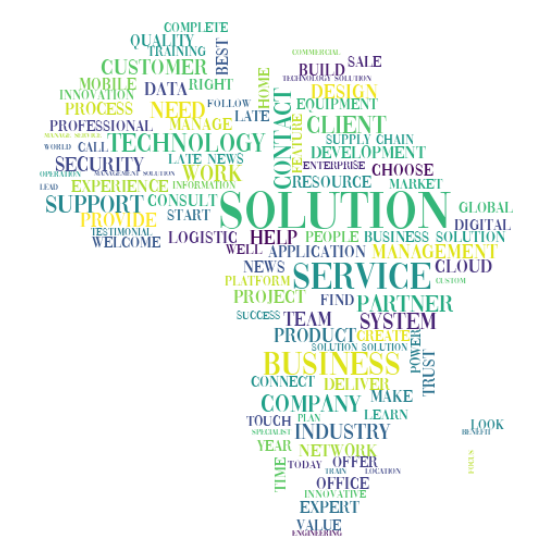

Word cloud for cluster 4


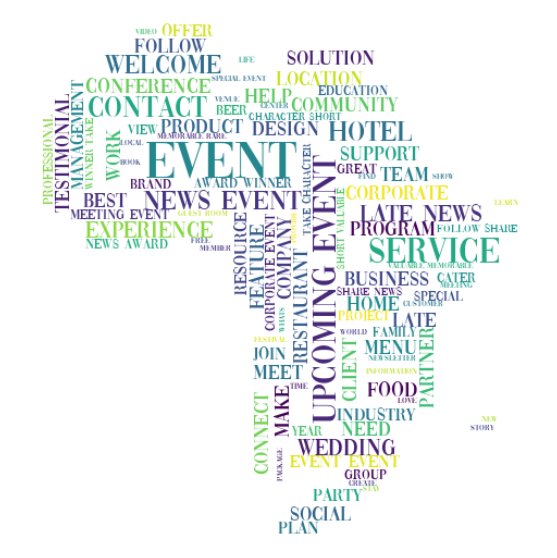

Word cloud for cluster 5


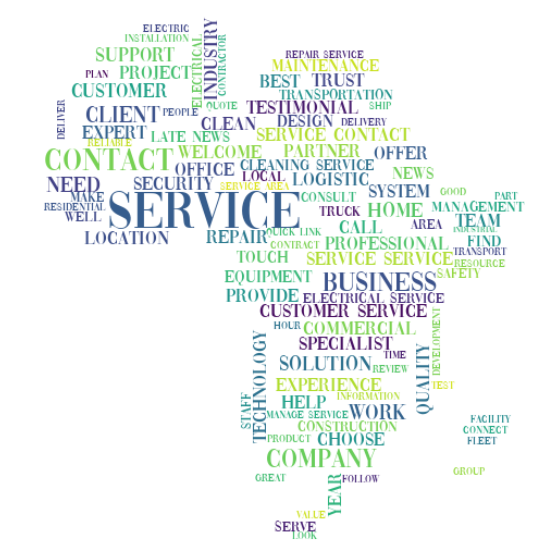

Word cloud for cluster 6


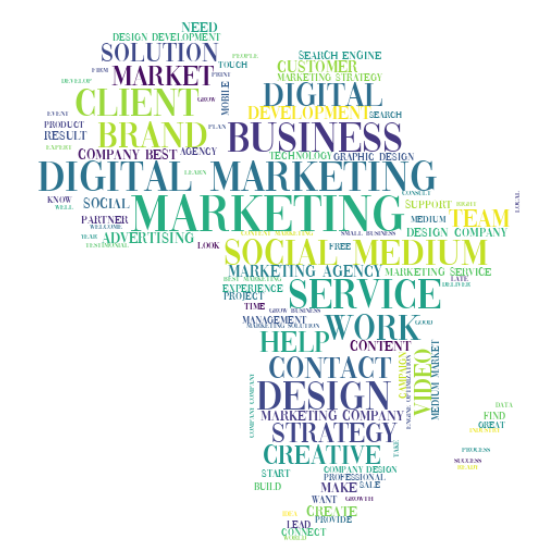

Word cloud for cluster 7


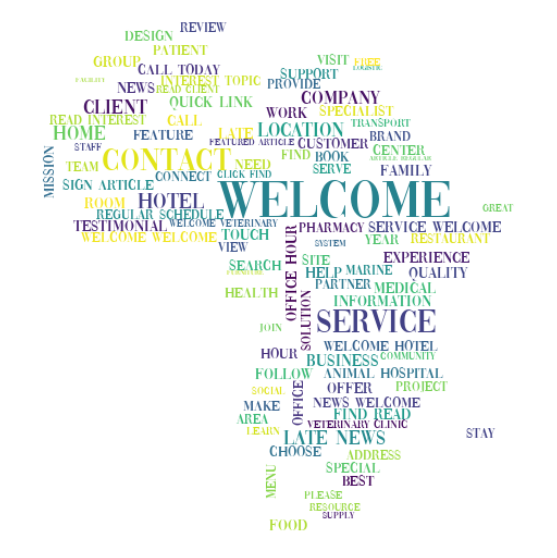

Word cloud for cluster 8


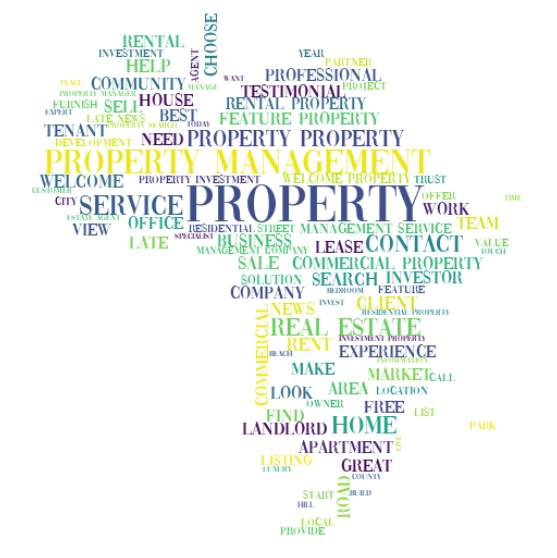

Word cloud for cluster 9


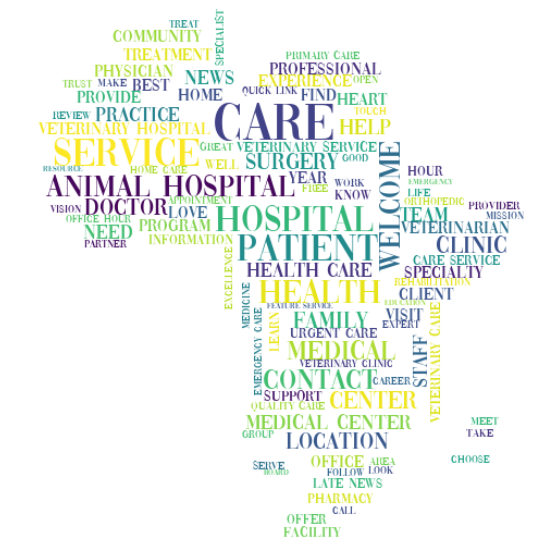

Word cloud for cluster 10


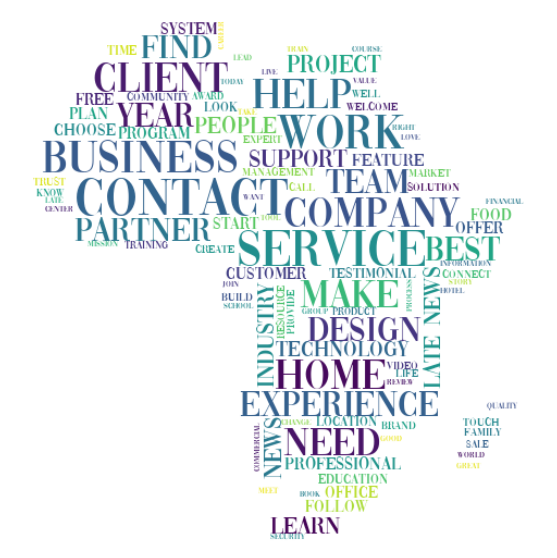

Word cloud for cluster 11


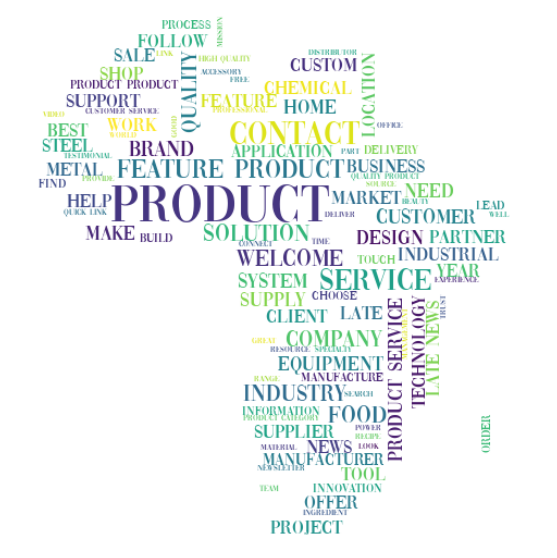

Word cloud for cluster 12


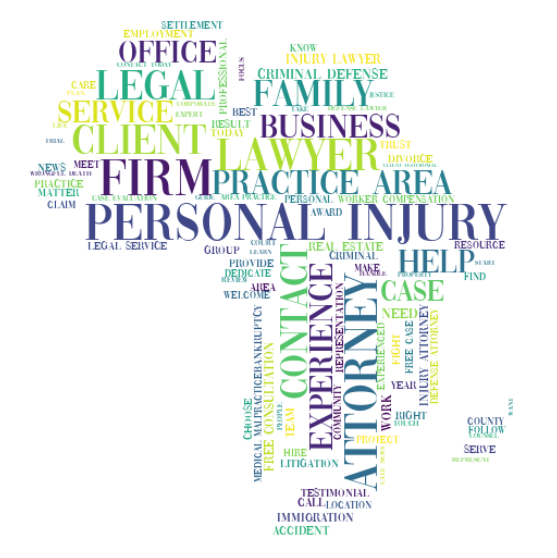

In [64]:
# Printing word cloud

for i in range(13):
  print(f'Word cloud for cluster {i}')
  word_cloud(text[i])

In [54]:
# Naming the clusters

name_of_cluster = {0 : "Industrials" , 1: "Insurance services" , 2: "Renewable Energy & products" , 3:"Corporate Services" , 4: "Event organizers" , 5: "Commercial Services & Supplies" , 6: "Digital Marketing" , 7: "Not Sure" , 8: "Real Estates" , 9: "HealthCare" , 10: "Not Sure" , 11: "Not Sure" , 12:"Law"}

In [ ]:
# Alternate function

# from wordcloud import WordCloud

# result={'cluster':labels,'header': dfh["headers"]}
# result=pd.DataFrame(result)
# for k in range(0,true_k):
#    s=result[result.cluster==k]
#    text=s['header'].str.cat(sep=' ')
#    text=text.lower()
#    text=' '.join([word for word in text.split()])
#    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
#    print('Cluster: {}'.format(k))        
#    plt.figure()
#    plt.imshow(wordcloud, interpolation="bilinear")
#    plt.axis("off")
#    plt.show()

#**Let's try TOPIC MODELING now and see what we get..**

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

output_notebook()

%matplotlib inline

In [ ]:
# Reading data

path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/preprocessed.csv"

d0 = pd.read_csv(path)

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

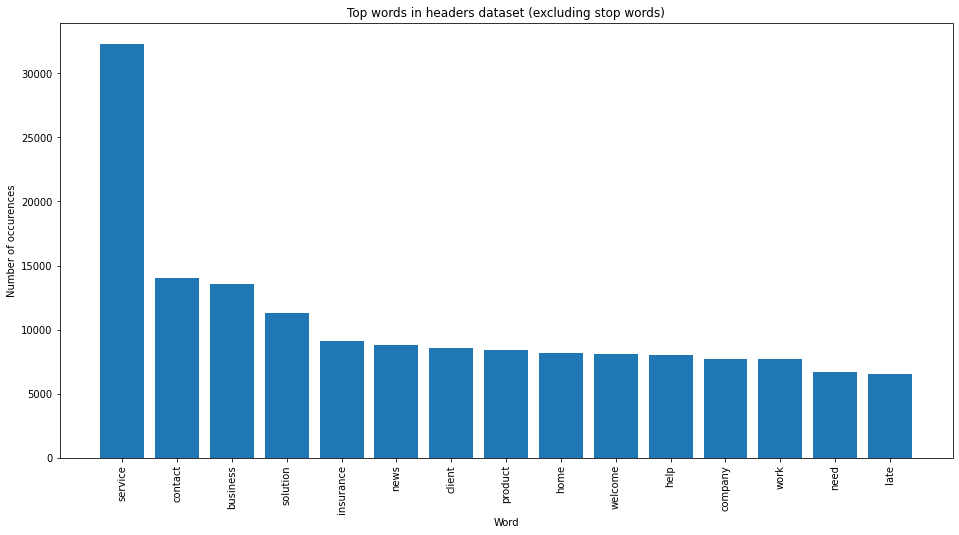

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=d0["headers"])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headers dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
vect = TfidfVectorizer(stop_words='english', max_features=100)
text = d0.headers.values[:30000]

print('Headline before vectorization: {}'.format(text[321]))

document_term_matrix = vect.fit_transform(text)

print('Headline after vectorization: \n{}'.format(document_term_matrix[321]))

Headline before vectorization: dedicate provide care feature product welcome family resource quick link patient tool
Headline after vectorization: 
  (0, 23)	0.32529598182199304
  (0, 47)	0.3221988963547301
  (0, 68)	0.28337694805209734
  (0, 72)	0.307820059408643
  (0, 74)	0.3450494799839559
  (0, 78)	0.34958209802595475
  (0, 62)	0.3482348103420619
  (0, 97)	0.2472946347483826
  (0, 4)	0.28650910283193765
  (0, 22)	0.33096576760187996


**Visualizing LDA model**

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -66881.94615062789
LDA model Perplexity on train data 161.47101820666353


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix , vect , mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  22.137510
3       51.163364 -159.968018       2        1  20.990768
2      -73.144554   21.523815       3        1  20.720906
0      -66.410133 -110.606438       4        1  18.789599
1       54.417324   12.443444       5        1  17.361217, topic_info=          Term         Freq        Total Category  logprob  loglift
38   insurance  1328.000000  1328.000000  Default  30.0000  30.0000
17      energy  1210.000000  1210.000000  Default  29.0000  29.0000
4         care  1084.000000  1084.000000  Default  28.0000  28.0000
85       solar   803.000000   803.000000  Default  27.0000  27.0000
53     medical   694.000000   694.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
50        make   102.388788   718.826845   Topic5  -4.6928  -0.1979
3     business   139.047399  1285.834500   Topic5  -4.3868  -0.4734
97     welcome   111.568306  1404.487737   Topic5  -4.6070  -0.7819
20  experience    90.078939   675.983809   Topic5  -4.8209  -0.2646
8       client    96.553112  1043.880058   Topic5  -4.7515  -0.6297

[209 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.131772  area
0         2  0.569827  area
0         3  0.090816  area
0         4  0.085474  area
0         5  0.122869  area
...     ...       ...   ...
99        1  0.417111  year
99        2  0.190633  year
99        3  0.117312  year
99        4  0.135235  year
99        5  0.138494  year

[419 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

**Well, for LDA as we took subset of our dataset and it resulted in only 5 components. It is not giving that much insights that we are getting from clustering.**